In [ ]:
# use SVM for non linear classifcation usinf kernels

In [6]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sb  
from scipy.io import loadmat  
from sklearn import svm  
%matplotlib inline
import os

def gaussian_kernel(x1, x2, sigma):  
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))

x1 = np.array([1.0, 2.0, 1.0])  
x2 = np.array([0.0, 4.0, -1.0])  
sigma = 2  
gaussian_kernel(x1, x2, sigma) 

0.32465246735834974

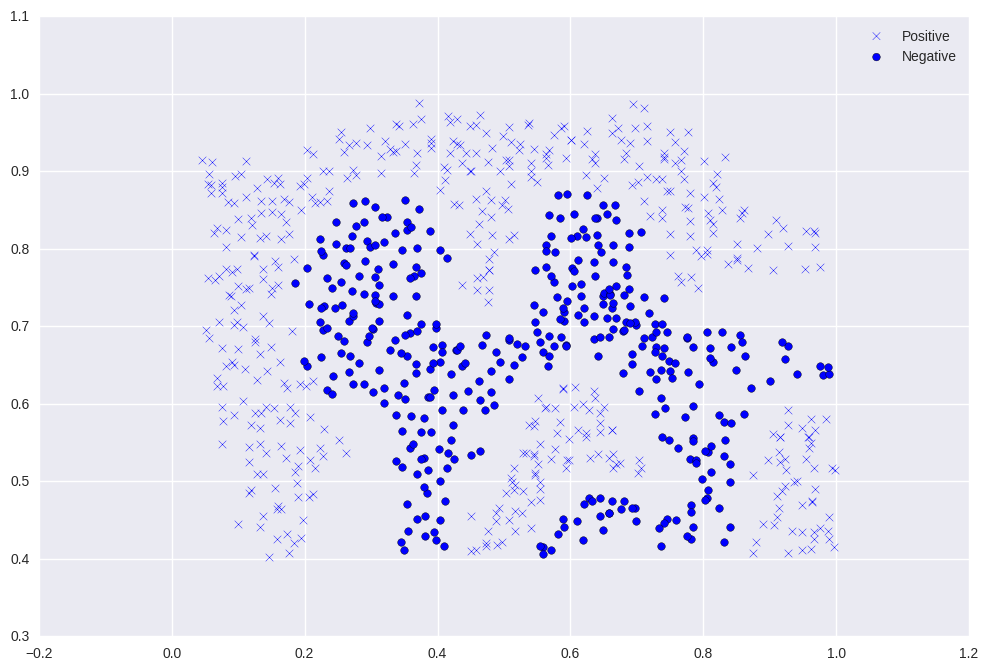

In [3]:
path = os.getcwd() + '/ex6data2.mat'
raw_data = loadmat(path)


data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])  
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]  
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')  
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')  
ax.legend() 

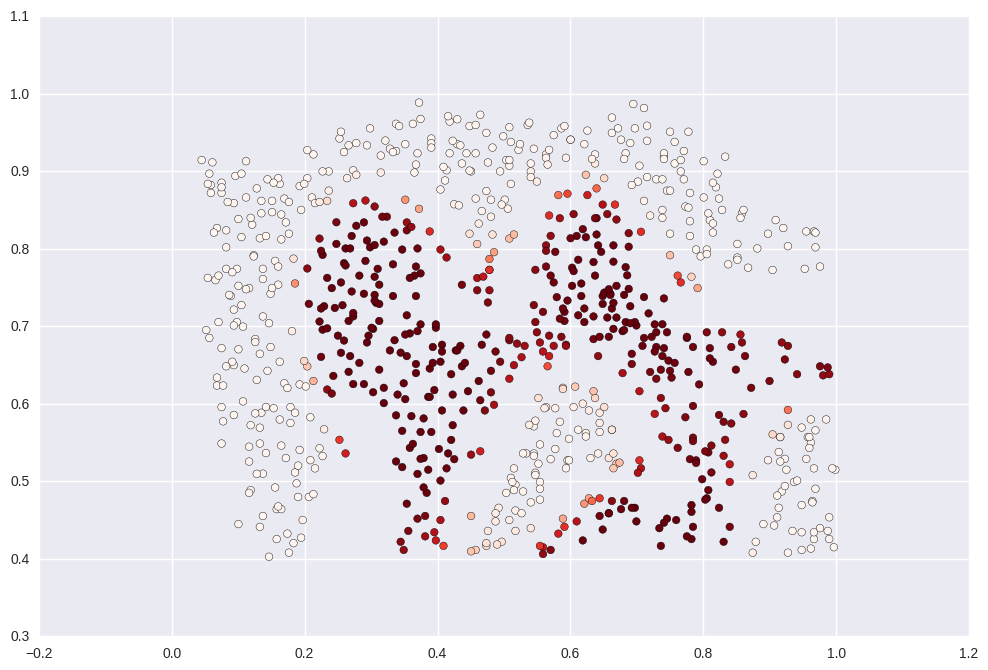

In [7]:
#Use built-in RBF kernel  
#Shade the points based on the predicted probability that the instance has a negative class label

svc = svm.SVC(C=100, gamma=10, probability=True)  
svc.fit(data[['X1', 'X2']], data['y'])  
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')  

In [8]:
path = os.getcwd() + '/ex6data3.mat'
raw_data = loadmat(path)

X = raw_data['X']  
Xval = raw_data['Xval']  
y = raw_data['y'].ravel()  
yval = raw_data['yval'].ravel()

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]  
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0  
best_params = {'C': None, 'gamma': None}

for C in C_values:  
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)

        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score, best_params  

(0.96499999999999997, {'C': 0.3, 'gamma': 100})

In [11]:
path = os.getcwd() + '/spamTrain.mat'
spam_train = loadmat(path)
path = os.getcwd() + '/spamTest.mat'
spam_test = loadmat(path)

spam_train 

{'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 'y': array([[1],
        [1],
        [0],
        ..., 
        [1],
        [0],
        [0]], dtype=uint8)}

In [12]:
X = spam_train['X']  
Xtest = spam_test['Xtest']  
y = spam_train['y'].ravel()  
ytest = spam_test['ytest'].ravel()

In [13]:
svc = svm.SVC()  
svc.fit(X, y)  
print('Test accuracy = {0}%'.format(np.round(svc.score(Xtest, ytest) * 100, 2)))  

Test accuracy = 95.3%
